In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
mail = pd.read_csv("/Users/berkutay/Downloads/spam.csv", encoding= "latin1") # İngilizce dili latin1 encodinden oluşuyor

In [4]:
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Veri Temizleme ve EDA

In [5]:
mail= mail.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [6]:
mail.rename(columns= {"v1": "target", "v2": "text"}, inplace = True)

In [7]:
mail.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
duplicate_count = mail.duplicated().sum()
print(f"Toplam Tekrar Eden Gözlem Sayısı: ", duplicate_count)

Toplam Tekrar Eden Gözlem Sayısı:  403


In [10]:
mail.drop_duplicates(inplace= True)

In [11]:
mail.duplicated().sum()

0

In [12]:
grouped_target = mail.groupby("target").count()
grouped_target["text"]

target
ham     4516
spam     653
Name: text, dtype: int64

In [13]:
mail.isnull().sum()

target    0
text      0
dtype: int64

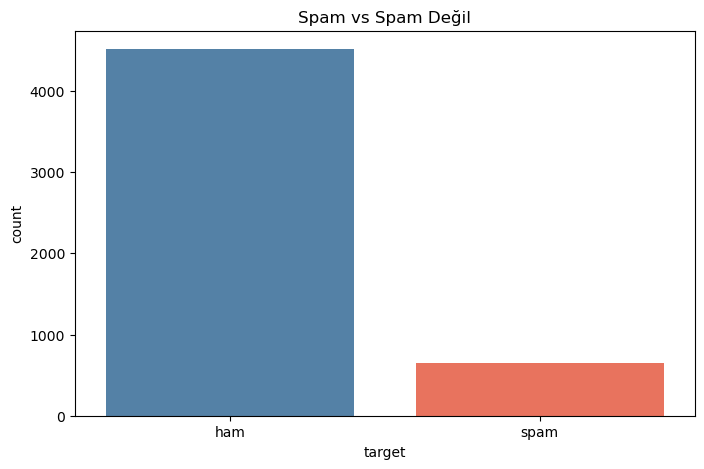

In [14]:

plt.figure(figsize= (8,5))

import seaborn as sns 

sns.barplot(x = mail["target"].value_counts().index,
            y = mail["target"].value_counts(),
            palette= (['#4682B4','#FF6347'])).set(title= "Spam vs Spam Değil")

plt.show()

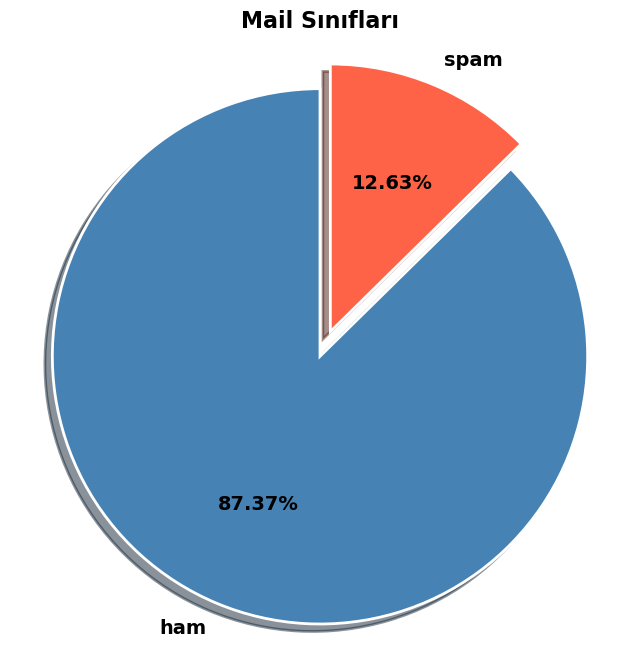

In [15]:
import matplotlib.pyplot as plt

colors = ['#4682B4', '#FF6347']

explode = (0, 0.1) 

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

wedges, texts, autotexts = ax.pie(
    mail["target"].value_counts(), labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Mail Sınıfları', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()

In [16]:
import nltk
# nltk.download()

In [17]:
## Veri Uzunluğu ve Yapısı
mail["num_sentence"] = mail["text"].apply(lambda x : len (nltk.sent_tokenize(x)))  # Cümle sayısı
mail["num_words"] = mail["text"].apply(lambda x : len (nltk.word_tokenize(x))) # Kelime Sayısı
mail["num_char"] = mail["text"].apply(len) # Karakter sayısı

In [18]:
mail[["num_sentence", "num_words", "num_char"]].describe()

,num_sentence,num_words,num_char
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


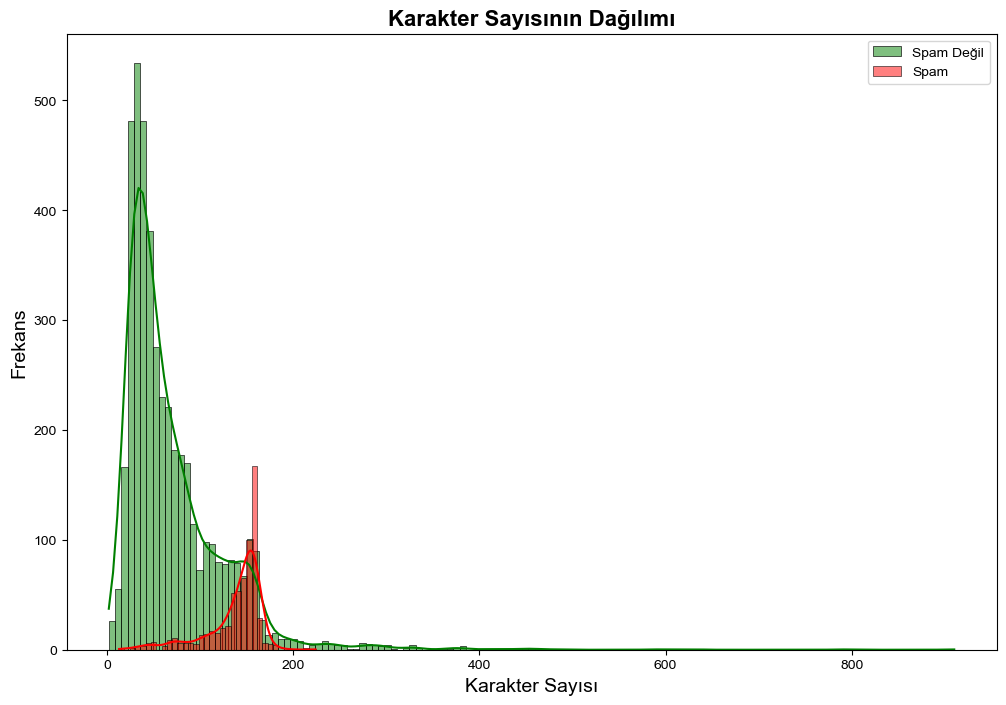

In [19]:
## Karakter Uzunluğu Karşılaştırması

plt.figure(figsize= (12,8))

sns.histplot(mail[mail['target']== "ham"]['num_char'], color='green', label='Spam Değil', kde=True)
sns.histplot(mail[mail['target']== "spam"]['num_char'], color='red', label='Spam', kde=True)

plt.xlabel('Karakter Sayısı', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.title('Karakter Sayısının Dağılımı', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


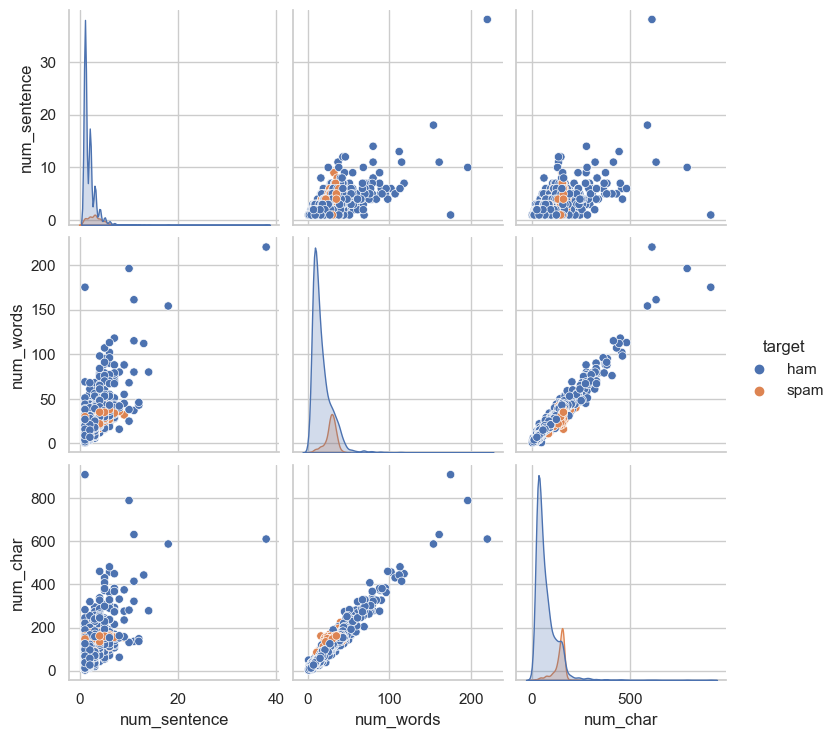

In [20]:
sns.pairplot(data= mail, vars= ["num_sentence", "num_words", "num_char"], 
             kind= "scatter", hue="target")
plt.show()

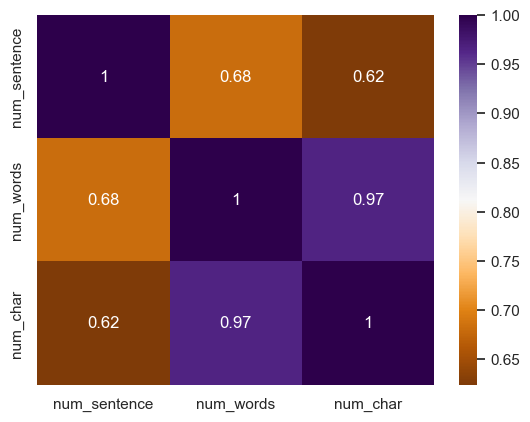

In [21]:
sns.heatmap(mail[["num_sentence", "num_words", "num_char"]].corr(), annot= True, cmap="PuOr")
plt.show()

## Veri Ön İşleme

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer() # Martin Porter Stem algoritması

# Fonksiyon yardımıyla tüm ön işleme adımlarını gerçekleştirme
def transform_text(text):
    text = text.lower() # Tüm harfleri küçük yapma
    text = nltk.word_tokenize(text) # Tokenize etme
    text = [word for word in text if word.isalnum()] # alfanumerik olmayan tokenleri kontrol etme 
    text = [word for word in text if word not in stopwords.words("english") and word not in string.punctuation]
    text = [ps.stem(word) for word in text]
    return " ".join(text)


In [23]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/berkutay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/berkutay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mail["text"], mail["target"], test_size=0.2, random_state= 42)


In [26]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [27]:
X_train = X_train.apply(transform_text)
X_test = X_test.apply(transform_text)

In [28]:
print("Processed Training Texts:")
print(X_train.head())

print("\nProcessed Test Texts:")
print(X_test.head())

print("\nEncoded Training Labels:")
print(y_train)

print("\nEncoded Test Labels:")
print(y_test)

Processed Training Texts:
2228                                         exact intent
5529                                                  one
2149                           waaaat lololo ok next time
5058    free video camera phone half price line rental...
5051    tick tick tick could die loneli know pout stom...
Name: text, dtype: object

Processed Test Texts:
1617                                 u download fring app
2064    pass di ur contact n see wat u get red luv wid...
1272                                                   ok
3020                                  film ill call later
3642    sorri left phone upstair ok might hectic would...
Name: text, dtype: object

Encoded Training Labels:
[0 0 0 ... 0 0 1]

Encoded Test Labels:
[0 0 0 ... 1 0 0]


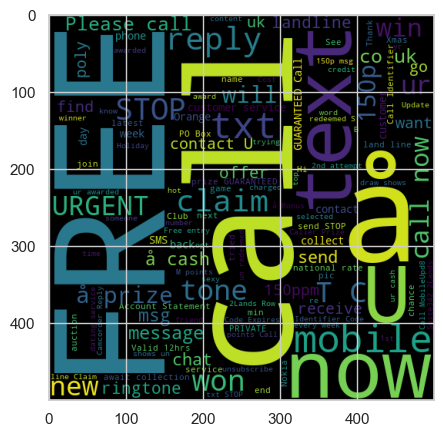

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(mail[mail['target'] == "spam"]['text'].str.cat(sep = " "))
plt.figure(figsize = (15,5))
plt.imshow(spam_wc)
plt.show()

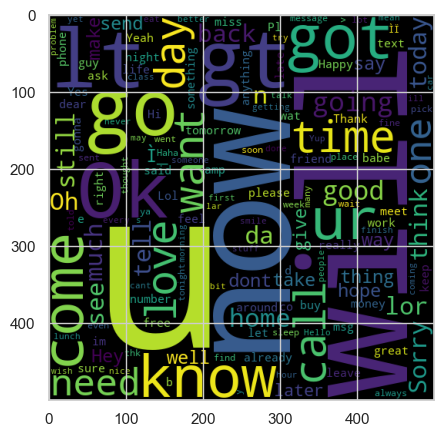

In [30]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(mail[mail['target'] == "ham"]['text'].str.cat(sep = " "))
plt.figure(figsize = (15,5))
plt.imshow(spam_wc)
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer() # Bag of words e çeviriyor
tfid = TfidfVectorizer(max_features= 3500) # Sık kullanılan kelimeleri regulurize ederek cezalandırıyor, özgün kelimelere ağırlık veriyor


In [32]:
X_train_tfid = tfid.fit_transform(X_train).toarray()
X_train_cv = cv.fit_transform(X_train).toarray()

X_test_tfid = tfid.transform(X_test).toarray()
X_test_cv = cv.transform(X_test).toarray()


## Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) # Sınıf Dengesizliğini hesaplama
models = [
    ("SVC", SVC(kernel="sigmoid", gamma=1.0, random_state= 2)),
    ("MultinomialNB", MultinomialNB()),
    ("LogisticRegression", LogisticRegression(solver="liblinear", penalty="l1", class_weight= "balanced")),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=50, random_state=2, class_weight= "balanced")),
    ("ExtraTreesClassifier", ExtraTreesClassifier(n_estimators=50, random_state=2, class_weight= "balanced")),
    ("XGBClassifier", XGBClassifier(n_estimators=50, random_state=2, n_jobs=2, scale_pos_weight = scale_pos_weight)),
]


In [35]:
evaluation_results = []

for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train_tfid, y_train)  # Train the model
    
    print(f"Evaluating {name}...")
    
    # Predict on train data
    y_train_pred = model.predict(X_train_tfid)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    
    # Predict on test data
    y_test_pred = model.predict(X_test_tfid)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Display classification reports
    print(f"Classification Report for {name} (Train):\n{classification_report(y_train, y_train_pred)}")
    print(f"Classification Report for {name} (Test):\n{classification_report(y_test, y_test_pred)}")
    
    # Store results
    evaluation_results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Train F1": train_f1,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Test Accuracy": test_accuracy,
        "Test F1": test_f1,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
    })

Training SVC...
Evaluating SVC...
Classification Report for SVC (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3627
           1       0.98      0.89      0.94       508

    accuracy                           0.98      4135
   macro avg       0.98      0.95      0.96      4135
weighted avg       0.98      0.98      0.98      4135

Classification Report for SVC (Test):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.89      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Training MultinomialNB...
Evaluating MultinomialNB...
Classification Report for MultinomialNB (Train):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3627
           1       1.00

In [36]:
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Metrics for All Models:")
print(evaluation_df)


Evaluation Metrics for All Models:
                    Model  Train Accuracy  Train F1  Train Precision  \
0                     SVC        0.984764  0.935118         0.980562   
1           MultinomialNB        0.977993  0.901834         0.997613   
2      LogisticRegression        0.974607  0.903581         0.846816   
3  RandomForestClassifier        0.999758  0.999015         1.000000   
4    ExtraTreesClassifier        0.999758  0.999015         1.000000   
5           XGBClassifier        0.992261  0.969052         0.952471   

   Train Recall  Test Accuracy   Test F1  Test Precision  Test Recall  
0      0.893701       0.978723  0.921429        0.955556     0.889655  
1      0.822835       0.968085  0.872587        0.991228     0.779310  
2      0.968504       0.952611  0.844444        0.782353     0.917241  
3      0.998031       0.970019  0.880309        1.000000     0.786207  
4      0.998031       0.979691  0.922509        0.992063     0.862069  
5      0.986220       0.965

## En iyi Modelleri Fine Tune Etme 

#### SVC

In [37]:
from sklearn.model_selection import GridSearchCV
svc = SVC(class_weight= "balanced", random_state = 2)
svc_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}
svc_grid = GridSearchCV(svc,
                        svc_param_grid,
                        cv = 3,
                        verbose= 2,
                        n_jobs=3)

svc_grid.fit(X_train_tfid, y_train)

print("En İyi Parametreler : ", svc_grid.best_params_)
print("En İyi Ağırlıklandırılmıi F1-Score : ", svc_grid.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  13.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  14.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  14.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  21.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  21.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  21.5s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.8s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.4s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  14.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  13.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  13.4s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  13.9s
[CV] END ...................

In [38]:
svc_best = svc_grid.best_estimator_
y_pred_svc = svc_best.predict(X_test_tfid)

print("SVC Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svc))

SVC Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.90      0.91      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svc = confusion_matrix(y_true=y_test, y_pred=y_pred_svc)

In [40]:
cm_svc

array([[875,  14],
       [ 13, 132]])

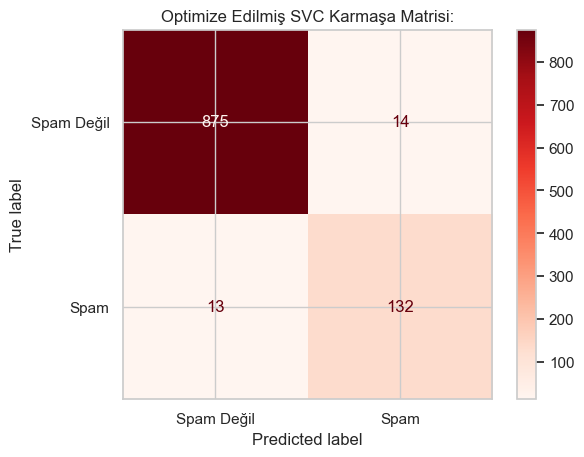

In [41]:
y_pred_svc = svc_best.predict(X_test_tfid)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Spam Değil', 'Spam'])
disp_svc.plot(cmap='Reds')
plt.title("Optimize Edilmiş SVC Karmaşa Matrisi:")
plt.show()

#### Multinomial Naive Bayes

In [42]:
from sklearn.metrics import make_scorer, f1_score
mnb_param_grid = {
    "alpha": [0.1, 0.5, 1.0, 2.0, 5.0]
}

mnb = MultinomialNB()

mnb_grid = GridSearchCV(
    mnb,
    mnb_param_grid,
    scoring= make_scorer(f1_score, average = "weighted"),
    cv=3,
    verbose= 2,
    n_jobs= 4
)

mnb_grid.fit(X_train_tfid, y_train)

print("En İyi Parametreler : ", mnb_grid.best_params_)
print("En İyi Ağırlıklandırılmıi F1-Score : ", mnb_grid.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=2.0; total time=   0.0s
[CV] END ..........................................alpha=2.0; total time=   0.0s
[CV] END ..........................................alpha=2.0; total time=   0.1s
[CV] END ........................................

In [43]:
mnb_best = mnb_grid.best_estimator_
y_pred_mnb = mnb_best.predict(X_test_tfid)

print("MNB Test Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svc))

MNB Test Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.90      0.91      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.97      0.97      0.97      1034



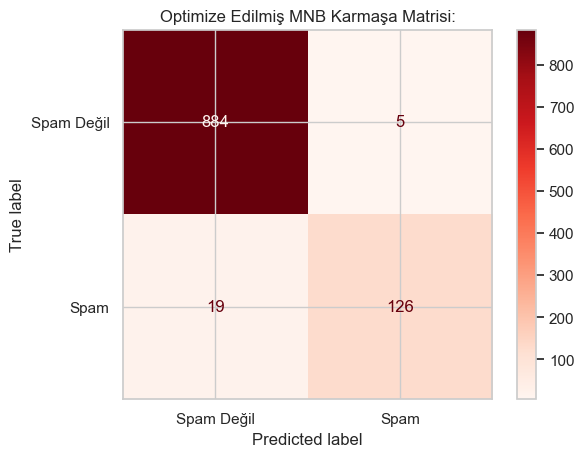

In [44]:
cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_pred_mnb)

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=['Spam Değil', 'Spam'])
disp_svc.plot(cmap='Reds')
plt.title("Optimize Edilmiş MNB Karmaşa Matrisi:")
plt.show()

In [45]:
import joblib

# Save the best Multinomial Naive Bayes model
joblib_file = "best_mnb_model.pkl"
joblib.dump(mnb_best, joblib_file)

print(f"Model saved as {joblib_file}")

Model saved as best_mnb_model.pkl


In [46]:
joblib.dump(tfid,"vectorizer.pkl")

['vectorizer.pkl']